<a href="https://colab.research.google.com/github/The-DarK-os/deep-learning/blob/master/tensorflow_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
cols_to_norm = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


In [4]:
%tensorflow_version 1.3
import tensorflow as tf
print(tf.__version__)

diabetes.columns

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.3`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.
1.15.2


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
num_preg = tf.feature_column.numeric_column("Pregnancies")
plasma_gluc = tf.feature_column.numeric_column("Glucose")
dias_press = tf.feature_column.numeric_column("BloodPressure")
skin_thick  = tf.feature_column.numeric_column("SkinThickness")
insulin = tf.feature_column.numeric_column("Insulin")
bmi = tf.feature_column.numeric_column("BMI")
diabetes_pedigree = tf.feature_column.numeric_column("DiabetesPedigreeFunction")
age = tf.feature_column.numeric_column("Age")

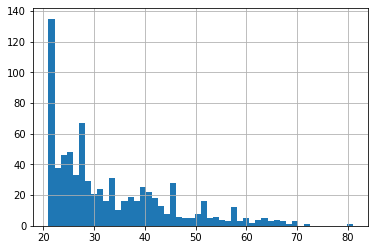

In [6]:
diabetes['Age'].hist(bins=50)

In [7]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])
feat_cols = [num_preg,plasma_gluc,dias_press,skin_thick,insulin,bmi,diabetes_pedigree,age,age_bucket]
x_data = diabetes.drop("Outcome",axis=1)
labels = diabetes['Outcome']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.33, random_state=101)

In [16]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp449gugk5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ffb66c5e310>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [18]:
model.train(input_fn = input_func,steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp449gugk5/mo

In [20]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-08-25T15:36:06Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp449gugk5/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-08-25-15:36:06
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.71259844, accuracy_baseline = 0.65748036, auc = 0.78068, auc_precision_recall = 0.6270653, average_loss = 0.55570966, global_step = 1000, label/mean = 0.34251967, loss = 5.428856, precision = 0.5714286, prediction/mean = 0.4306703, recall = 0.6436782
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmp449gugk5/model.ckpt-1000


In [21]:
results

{'accuracy': 0.71259844,
 'accuracy_baseline': 0.65748036,
 'auc': 0.78068,
 'auc_precision_recall': 0.6270653,
 'average_loss': 0.55570966,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 5.428856,
 'precision': 0.5714286,
 'prediction/mean': 0.4306703,
 'recall': 0.6436782}

In [23]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)
predictions = model.predict(pred_input_func)
print(list(predictions))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp449gugk5/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[{'logits': array([0.11734921], dtype=float32), 'logistic': array([0.52930367], dtype=float32), 'probabilities': array([0.4706963 , 0.52930367], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([0.7728502], dtype=float32), 'logistic': array([0.6841371], dtype=float32), 'probabilities': array([0.3158629 , 0.68413717], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([-0.09020507], dtype=float32), 'logistic': array([0.47746402], dtype=float

In [28]:
dnn_model = tf.estimator.DNNClassifier(hidden_units = [10,10,10],feature_columns=feat_cols,n_classes=2)
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpmr6mowwo', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ffb5f2aec50>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
Instructions for updat

In [31]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,shuffle=False)
dnn_results = dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-08-25T16:39:55Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpmr6mowwo/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-08-25-16:39:55
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.6968504, accuracy_baseline = 0.65748036, auc = 0.7419988, auc_precision_recall = 0.5761858, average_loss = 0.57905406, global_step = 1000, label/mean = 0.34251967, loss = 5.656913, precision = 0.55813956, prediction/mean = 0.37591588, recall = 0.55172414
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpmr6mowwo/model.ckpt-1000


In [32]:
print(results)
print("\n")
print(dnn_results)

{'accuracy': 0.71259844, 'accuracy_baseline': 0.65748036, 'auc': 0.78068, 'auc_precision_recall': 0.6270653, 'average_loss': 0.55570966, 'label/mean': 0.34251967, 'loss': 5.428856, 'precision': 0.5714286, 'prediction/mean': 0.4306703, 'recall': 0.6436782, 'global_step': 1000}


{'accuracy': 0.6968504, 'accuracy_baseline': 0.65748036, 'auc': 0.7419988, 'auc_precision_recall': 0.5761858, 'average_loss': 0.57905406, 'label/mean': 0.34251967, 'loss': 5.656913, 'precision': 0.55813956, 'prediction/mean': 0.37591588, 'recall': 0.55172414, 'global_step': 1000}
